In [1]:
import sys
import os
import numpy as np
from numpy import mean
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import julian
import datetime

from statistics import stdev
from statistics import mean

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

In [2]:
ls

2022_Feb_week4_Mean_calculation.ipynb
2022_Feb_week4_Mean_calculation_OC_01.txt
2022_Feb_week4_Mean_calculation_OC_02.txt
2022_Feb_week4_Mean_calculation_OC_03.txt
2022_Feb_week4_Mean_calculation_OC_04.txt
2022_Feb_week4_Mean_calculation_OC_05.txt
2022_Feb_week4_Mean_calculation_OC_06.txt
2022_Feb_week4_Mean_calculation_OC_07.txt
2022_Feb_week4_Mean_calculation_OC_08.txt
2022_Feb_week4_Mean_calculation_OC_09.txt
2022_Feb_week4_Mean_calculation_OC_10.txt
2022_Feb_week4_Mean_calculation_OC_11.txt
2022_Feb_week4_Mean_calculation_OC_12.txt
2022_Feb_week4_Mean_calculation_OC_13.txt
2022_Feb_week4_Mean_calculation_OC_14.txt
2022_Feb_week4_Mean_calculation_OC_15.txt
2022_Feb_week4_Mean_calculation_OC_16.txt
2022_Feb_week4_Mean_calculation_OC_17.txt
2022_Feb_week4_Mean_calculation_OC_18.txt
2022_Feb_week4_Mean_calculation_OC_19.txt
2022_Feb_week4_Mean_calculation_OC_20.txt
2022_Feb_week4_Mean_calculation_OC_21.txt
2022_Feb_week4_Mean_calculation_OC_22.txt
2022_Feb_week4_Mean_calculation_OC_23.

In [3]:
DP_Leo = open("2022_Feb_week4_Mean_calculation_T0_combined.txt",'r').readlines()
N_dpleo = len(DP_Leo)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("2022_Feb_week4_Mean_calculation_T0_combined.txt"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split("\t")[0]))
        T_obs.append(float(li.split("\t")[1]))
        T_obs_err.append(float(li.split("\t")[2]))

In [4]:
T0_bjd = 2448773.214849387
T0_bjd_err = 2.9890246655224374e-09
P0_day = 0.062362845136031624
P0_day_err = 2.839163568630105e-19

In [5]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo)]
Delta_aT = [i for i in range(N_dpleo)]
Delta_aT_err = [i for i in range(N_dpleo)]
E_af = [i for i in range(N_dpleo)] #float number
E_ak = [i for i in range(N_dpleo)] #integer number
E_aj = [i for i in range(N_dpleo)] #integer number
P_aE = [i for i in range(N_dpleo)]
P_err_aE = [i for i in range(N_dpleo)]
T_aC_linear = [i for i in range(N_dpleo)]
T_aO_linear = [i for i in range(N_dpleo)]
P_aver_a = [i for i in range(N_dpleo)]
P_aver_std_a = [i for i in range(N_dpleo)]

In [6]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo):
    BJD_time = np.array(T_obs)+delta_tdb_tt
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("2022_Feb_week4_OC_diagram.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2444214.553250	-73099	2444214.553250	2444214.553233	1.487097	14.999646
1	2444214.615620	-73098	2444214.615620	2444214.615596	2.105279	14.999646
2	2444214.677980	-73097	2444214.677980	2444214.677958	1.859495	14.999646
3	2444968.023090	-61017	2444968.023090	2444968.021128	169.540823	99.999966
4	2444968.957120	-61002	2444968.957120	2444968.956570	47.485560	99.999966
5	2444969.019620	-61001	2444969.019620	2444969.018933	59.335747	99.999966
6	2444978.997550	-60841	2444978.997550	2444978.996988	48.516575	99.999966
7	2444993.900780	-60602	2444993.900780	2444993.901708	-80.218354	59.999358
8	2444993.963280	-60601	2444993.963280	2444993.964071	-68.368167	59.999358
9	2444994.026420	-60600	2444994.026420	2444994.026434	-1.222001	59.999358
10	2445020.905130	-60169	2445020.905130	2445020.904820	26.749684	19.999614
11	2445021.902920	-60153	2445021.902920	2445021.902626	25.408553	19.999614
12	2445024.833860	-60106	2445024.833860	24

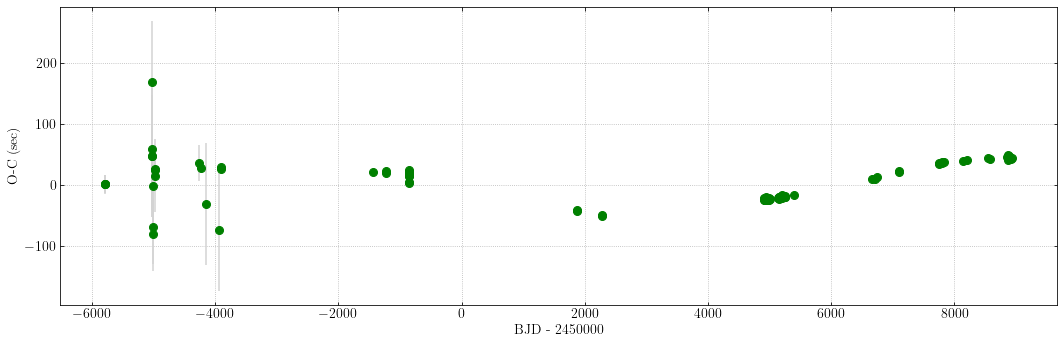

In [7]:
#Plot O-C vs BJD
Input_Schwope_2002  = '2022_Feb_week4_OC_diagram.out'
Data_Schwope_2002   = np.genfromtxt(Input_Schwope_2002)

N = 2450000
BJD_time_Schwope_2002 = Data_Schwope_2002[:,0] - N
Cycle_Schwope_2002 = Data_Schwope_2002[:,1]
T_O_linear_Schwope_2002 = Data_Schwope_2002[:,2]
T_C_linear_Schwope_2002 = Data_Schwope_2002[:,3]
OC_s_Schwope_2002 = Data_Schwope_2002[:,4]
OC_s_err_Schwope_2002 = Data_Schwope_2002[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Schwope_2002)
x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')

#Schwope_2002
#plt.text(BJD_time_Schwope_2002[0], 300, '1979')
#plt.text(BJD_time_Schwope_2002[3], 300, '1981')
#plt.text(BJD_time_Schwope_2002[13], 300, '1984')
#plt.text(BJD_time_Schwope_2002[17], 300, '1985')
#plt.text(BJD_time_Schwope_2002[19]-100, 300, '1991')
#plt.text(BJD_time_Schwope_2002[20], 300, '1992')
#plt.text(BJD_time_Schwope_2002[22], 300, '1993')
#plt.text(BJD_time_Schwope_2002[30], 300, '2000')
#plt.text(BJD_time_Schwope_2002[32], 300, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
#plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("2022_Feb_week4_OC_diagram.jpg", dpi=1000)
plt.show()